# **Ensemble Methods in Diabetes Risk Prediction**

## **Introduction**

This notebook delves into ensemble methods, a cornerstone in machine learning that combines several models to boost predictive accuracy. We apply these techniques to a diabetes dataset, aiming to predict diabetes occurrence with higher precision.

## **Ensemble Techniques Overview**

### Process of Bagging:

1. Initiation: Begin with your comprehensive diabetes dataset.

2. Bootstrapping: Generate diverse training sets by randomly sampling the original dataset with replacement.

3. Model Development: Independently train each model (for instance, decision trees) on these varied datasets.

4. Consolidating Predictions: Aggregate the outcomes of all models by means of averaging (for regression) or voting (for classification), to produce a singular prediction.

5. Stability Enhancement: This aggregation leads to more stable and reliable predictions, minimizing the risk of overfitting.

Ensemble methods are classified into Bagging and Boosting:

- **Bagging:** Utilizes models like Random Forests, where numerous learners operate in parallel and vote for the final prediction.

- **Boosting:** Techniques like AdaBoost or Gradient Boosting sequentially correct the mistakes of previous models, focusing more on the hard-to-classify instances.

### Advantages

1. Variance Reduction: Significantly diminishes the model's sensitivity to data noise.

2. Augmented Accuracy: Typically improves the model's ability to generalize to unseen data.

3. Ease of Implementation: The bagging concept is straightforward and compatible with a variety of base models.

4. Efficiency: Independent model training allows for parallel computation, speeding up the process.

### Disadvantage

1. Bias Minimization: Primarily targets variance reduction, with less impact on bias.

2. Resource Intensity: The creation of multiple datasets and models may not always be feasible, especially with smaller datasets.

3. Optimal Size Determination: Finding the right number of models in the ensemble requires a balance between computational resources and desired performance.

### Random Forest in Diabetes Analysis

A prominent bagging-based ensemble method, Random Forest, augments decision tree performance by incorporating randomness in both dataset bootstrapping and feature selection, aiming for higher prediction accuracy and model robustness.

### Algorithm of Random Forest

1. Setup: Utilize the complete diabetes dataset as the starting point.

2. Bootstrap Sampling: Form multiple datasets via random sampling with replacement from the original data.

3. Feature Selection: At each split in the decision tree construction, randomly choose a subset of features.

4. Model Building: Develop individual decision trees on each bootstrapped dataset.

5. Predictions Synthesis: Aggregate the decision trees' predictions, using voting or averaging, to arrive at a final decision.

### Benefits of Random Forest

1. Superior Accuracy: Noted for its robustness and high predictive accuracy.

2. Mitigation of Overfitting: Integrates bagging and random feature selection to combat overfitting.

3. Insight on Feature Significance: Offers insights into the importance of various features in prediction.

4. Scalability: Facilitates parallel training of decision trees for efficient model development.

### Drawbacks of Random Forest

1. Model Complexity: With many trees and features, the model may become complex and computationally demanding.

2. Interpretation Challenges: The ensemble's collective decision-making process can obscure the rationale behind specific predictions.

3. Inference Time: The need to aggregate across numerous decision trees can slow down prediction times.

### Bagging with Diabetes Data

Here, we'll focus on Bagging through Random Forests to assess the risk of diabetes. The model takes features like Glucose, Insulin, BMI, etc., and predicts the probability of diabetes.

## **Random Forests Implementation**

In the context of classification, I am interested in precision, recall, f1-score, and potentially the AUC (Area Under the Curve) score as well, which are more informative than just accuracy. An example that includes Random Forest Classifier, here's provide detailed performance metrics:

The following code exemplifies Random Forest applied to the diabetes dataset:

Random Forest Classifier Accuracy: 0.7532467532467533
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

ROC AUC Score for Random Forest Classifier: 0.8039735099337747


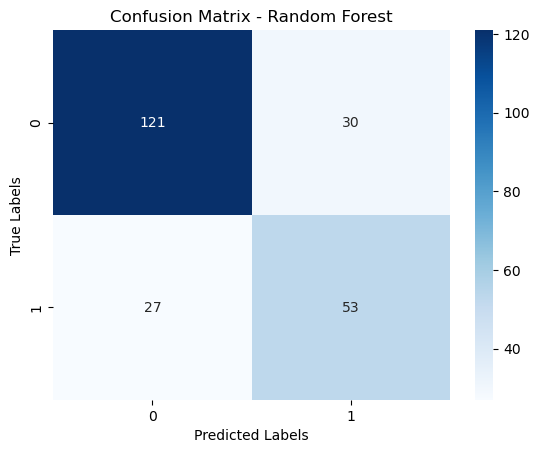

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Selecting features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
random_forest_cls = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_cls.fit(X_train, y_train)

# Making predictions with the Random Forest Classifier
y_pred_rf = random_forest_cls.predict(X_test)
y_pred_proba_rf = random_forest_cls.predict_proba(X_test)[:,1] # Probability estimates for ROC AUC

# Evaluating the Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Classification Report for Random Forest Classifier:\n", class_report_rf)
print(f"ROC AUC Score for Random Forest Classifier: {roc_auc_rf}")

# Plotting the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## **Interpretation of Random Forest Classifier Results on the Diabetes Dataset**

### **Random Forest Classifier Performance Metrics**

#### 1. **Accuracy:** 

Achieved an accuracy of approximately 75.32%, which indicates a solid general performance in predicting diabetes outcomes. This level of accuracy suggests the classifier is capable of distinguishing between diabetic and non-diabetic patients with a reasonable degree of reliability.

#### 2. **Precision, Recall, and F1-Score:**

- For non-diabetic patients (Class 0), precision was 82% with a recall of 80%, resulting in an F1-score of 81%. This implies the model is quite adept at identifying true non-diabetic cases and has a balanced precision-recall trade-off.

- For diabetic patients (Class 1), precision stood at 64% with a recall of 66%, leading to an F1-score of 65%. While the precision and recall are lower compared to non-diabetic predictions, they still reflect a fair capability to identify diabetic patients, though improvements could be beneficial.

#### 3. **ROC AUC Score:** 

A score of approximately 80.40% indicates a strong ability to differentiate between the classes. The ROC AUC Score is particularly important as it encompasses the model's performance across various threshold levels, providing a comprehensive view of its effectiveness.

## **Code Adaptation for Diabetes Dataset Analysis**

First, let's adjust the code snippets for the diabetes dataset, specifically for evaluating the Random Forest Classifier.

Random Forest Classifier Accuracy: 0.7532


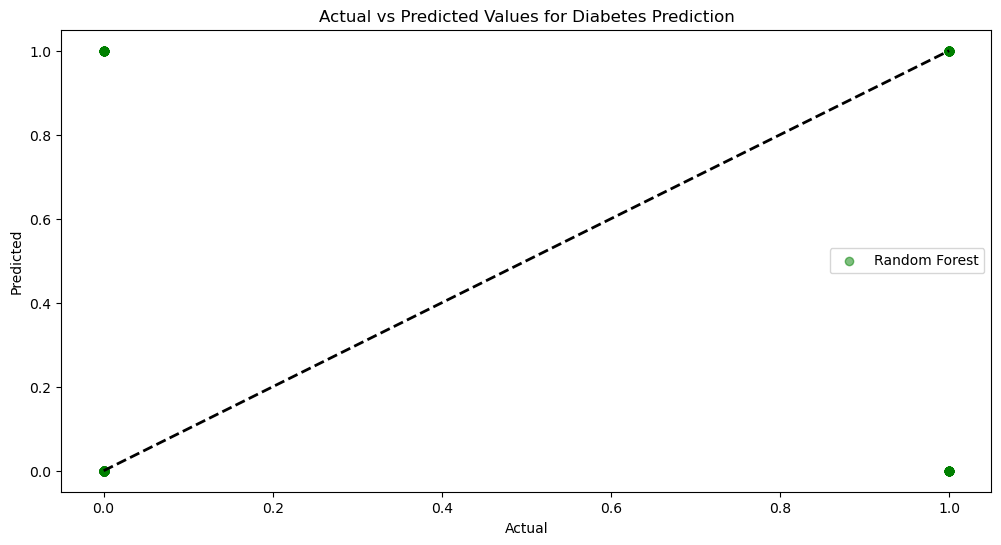

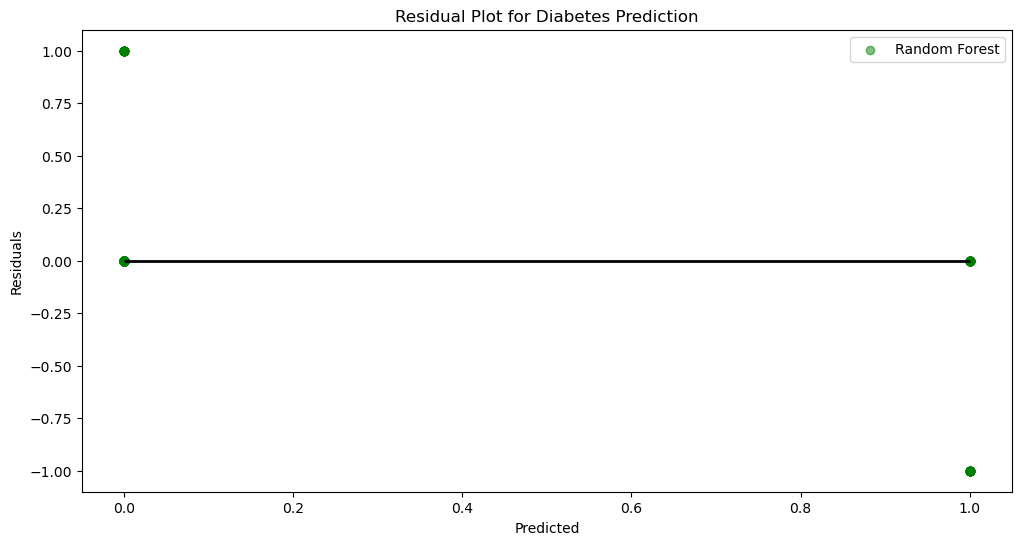

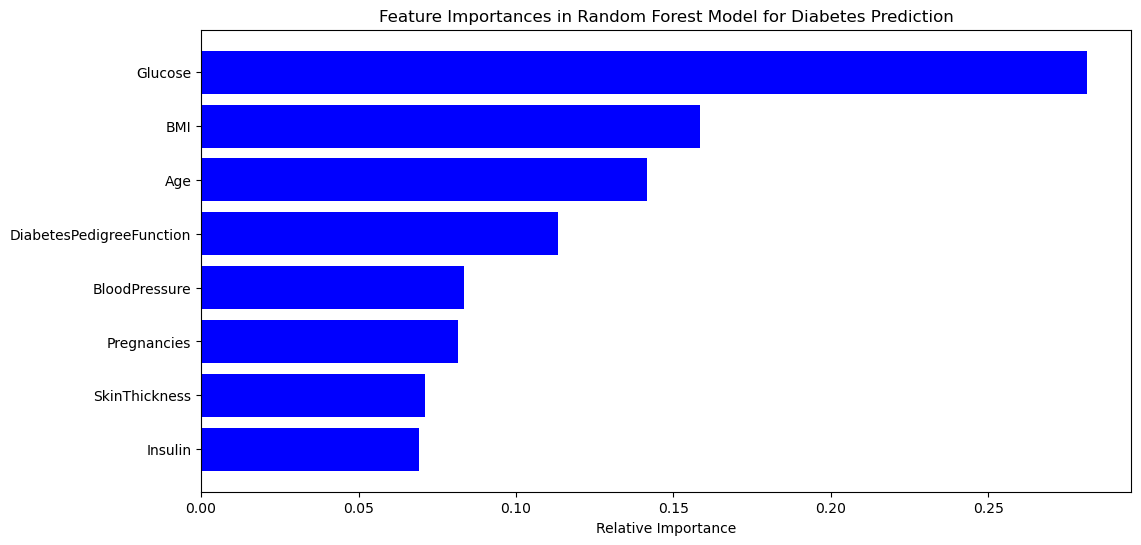

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest Classifier
random_forest_cls = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_cls.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_cls.predict(X_test)

# Accuracy of the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Diabetes Prediction')
plt.legend()
plt.show()

# Error Analysis: Residual Plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, label='Random Forest', color='green')
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), color='black', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot for Diabetes Prediction')
plt.legend()
plt.show()

# Feature Importance from Random Forest
feature_importances_rf = random_forest_cls.feature_importances_
indices_rf = np.argsort(feature_importances_rf)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest Model for Diabetes Prediction')
plt.barh(range(len(indices_rf)), feature_importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [X.columns[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


### Random Forest Classifier Performance Analysis for Diabetes Prediction

The Random Forest Classifier yielded an accuracy of 75.32% in predicting diabetes outcomes. This reflects a competent level of model performance, given the complexity of medical prediction tasks, though there is room for improvement.

### Actual vs Predicted Values Plot

The plot displaying actual versus predicted values showcases the effectiveness of the Random Forest model. The points on the scatter plot fall near the dashed line that represents the line of perfect prediction. This close proximity to the line indicates that the model has a commendable rate of correct predictions, although it is not perfect. The closer clustering of points around the line, as seen in the plot, signifies a stronger correlation between predicted and actual values, affirming the model's precision.

### Residual Plot

The Residual Plot for Diabetes Prediction provides a visualization of the errors in prediction. Ideally, the residuals would be scattered around the horizontal line at zero, which would indicate no error. In the provided plot, while we observe that most residuals are clustered near the zero line, there are a few notable deviations. These outliers suggest instances where the model's predictions were significantly different from the actual values, hinting at potential areas where the model might be improved through further training or hyperparameter tuning.

### Feature Importances in Random Forest Model

The bar chart of feature importances derived from the Random Forest model for diabetes prediction underscores the relevance of each predictor in the dataset. Notably, 'Glucose' levels exhibit the highest importance, which aligns with medical understanding that blood sugar levels are a significant indicator of diabetes. Other features such as 'BMI', 'Age', and 'DiabetesPedigreeFunction' also play substantial roles, reinforcing the multifactorial nature of diabetes prediction. These insights could guide healthcare professionals in focusing on key health indicators when assessing diabetes risk.

## **Conclusions and Future Work**

Overall, the Random Forest Classifier has demonstrated its utility in predicting diabetes, with reasonable accuracy and interpretability of results through feature importance analysis. The actual versus predicted values and residual plots underscore the model's predictive capabilities while also highlighting areas for refinement. Future efforts may include exploring feature engineering to enhance model performance, implementing cross-validation to prevent overfitting, and incorporating other machine learning techniques such as ensemble methods to boost predictive power.